In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from pyfonts import load_font
cmap = plt.get_cmap('Dark2')

global FONT
FONT = load_font(
   font_path="../../../Documents/Raleway/static/Raleway-Medium.ttf"
)

plot_args = {"fontproperties":FONT, "fontsize": 32}


data_path = r"C:\Users\lhauptmann\Code\WristPPG2\scripts\features.csv"
updated_participants = ["alex", "anusha", "caroline", "eren", "gonzalo", "lilian", "miro", "rolando", "moritz", "amran", "bo", "davud", "frawa", "frawa", "julia", "maedeh", "miyuki", "oscar", "sam", "pam"]

LETTER_GESTURES = {
"a": "Swipe Forward",
"b": "Swipe Backward",
"c": "Swipe Left",
"d": "Swipe Right",
"p": "Fast Pinch",
"prr": "Rotate Right",
"prl": "Rotate Left",
"pbd": "Back to Default",
"pc": "Pinch Close",
"po": "Pinch Open",
"sp": "Side Tap",
"o": "Negative",
"s": "Knock"
}

In [166]:
df = pd.read_csv(data_path)
df = df[df["participant"].isin(updated_participants)]
df = df[df["label"].isin(["a", "b", "c", "d", "sp", "po", "pc"])]

In [178]:
df.filter(like="Standard", axis=1)

,acc_0_Standard deviation,acc_1_Standard deviation,acc_2_Standard deviation,gyro_0_Standard deviation,gyro_1_Standard deviation,gyro_2_Standard deviation,ppg_green_0_Standard deviation,ppg_green_1_Standard deviation,ppg_green_2_Standard deviation,ppg_green_3_Standard deviation,...,ppg_green_6_Standard deviation,ppg_green_7_Standard deviation,ppg_ir_0_Standard deviation,ppg_ir_1_Standard deviation,ppg_ir_2_Standard deviation,ppg_ir_3_Standard deviation,ppg_ir_4_Standard deviation,ppg_ir_5_Standard deviation,ppg_ir_6_Standard deviation,ppg_ir_7_Standard deviation
0,0.067988,0.124562,0.166816,8.242378,3.704496,2.640218,31.221922,18.811316,18.241162,15.189269,...,74.804115,33.358314,290.698726,218.911941,176.401277,252.504999,259.839322,297.030574,261.886020,110.151838
1,0.078190,0.199022,0.206169,9.789369,5.187737,3.527393,60.236338,24.541188,18.160330,19.252387,...,124.266288,42.663534,616.339470,417.651345,362.359530,456.640262,437.391472,485.025403,400.191147,187.095134
2,0.146611,0.265379,0.309026,15.252465,6.685773,3.885141,35.219023,29.348204,27.475626,15.933848,...,158.077360,65.687034,602.125658,276.033273,315.812693,407.836001,395.868076,429.706949,382.217676,230.804782
3,0.053095,0.272301,0.291232,11.770848,5.015453,2.319684,14.170854,13.698945,16.555540,22.750200,...,148.693939,103.116577,611.270796,361.959502,297.257661,415.302604,373.873933,389.012036,323.798595,186.809596
4,0.048023,0.213322,0.149435,5.999235,2.397816,2.049218,24.004450,13.895323,17.093891,12.108410,...,82.259920,35.041627,488.739705,277.767906,226.056116,371.162002,333.379984,350.019311,241.861416,131.726068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47669,0.090853,0.241273,0.237722,17.794844,5.927885,2.322348,24.234048,15.221353,15.947965,16.166645,...,12.092192,21.514126,88.774996,122.336420,139.963022,47.279648,59.363541,93.372383,68.803822,96.709451
47670,0.065064,0.162121,0.172144,10.608576,3.234685,2.245875,14.952227,11.293609,12.255611,9.540629,...,12.930008,14.694543,55.571477,90.193953,122.398893,42.328123,43.524176,74.281045,53.222645,63.946903
47671,0.076661,0.200895,0.191268,10.479439,4.100783,2.418898,14.703942,10.445951,14.616101,15.541879,...,10.663414,17.182768,48.380264,85.154551,127.843628,63.525289,41.379314,65.894142,51.980838,50.880582
47672,0.069681,0.203262,0.278036,12.139264,3.799274,3.242945,9.655050,8.463593,10.706895,6.555913,...,17.340505,17.656115,108.553506,116.042966,84.760722,94.136005,49.052310,65.661766,57.132529,110.052306


In [18]:
energy_summary = energy_features.describe().T

In [19]:
energy_summary

,count,mean,std,min,25%,50%,75%,max
acc_0_Absolute energy,53919.0,4887.330512,4420.156520,1.873422e-01,1071.307371,3213.570734,8635.555233,27885.860408
acc_0_Human range energy,53919.0,0.034167,0.123485,4.733768e-10,0.000006,0.000062,0.001245,0.999758
acc_0_Wavelet energy_14.02Hz,53919.0,0.815944,0.487039,1.973712e-02,0.459155,0.754925,1.148143,8.271226
acc_0_Wavelet energy_28.05Hz,53919.0,0.398950,0.230362,8.588482e-03,0.224949,0.370078,0.569999,3.844155
acc_0_Wavelet energy_3.12Hz,53919.0,3.617569,2.159436,4.505883e-02,1.982961,3.396965,5.178162,35.453763
...,...,...,...,...,...,...,...,...
ppg_ir_7_Wavelet energy_4.01Hz,53919.0,27417.202706,4756.044870,1.095861e+04,24259.143281,27594.677642,30645.993321,47763.534575
ppg_ir_7_Wavelet energy_4.68Hz,53919.0,23474.214406,4071.940614,9.386496e+03,20770.006029,23626.688178,26237.377375,40317.625905
ppg_ir_7_Wavelet energy_5.61Hz,53919.0,19563.783906,3393.759772,7.825736e+03,17310.235704,19689.452514,21866.650519,32734.275236
ppg_ir_7_Wavelet energy_7.01Hz,53919.0,15644.202117,2714.140529,6.259951e+03,13842.505078,15744.822971,17486.066231,25267.819375


In [180]:

metric = "rms"
metric = "Root mean square"
metric = "Mean absolute deviation"
df[f"acc_{metric}"] = df[f"acc_2_{metric}"] /  df[f"acc_2_Standard deviation"] + df[f"acc_1_{metric}"] /  df[f"acc_1_Standard deviation"] + df[f"acc_0_{metric}"] /  df[f"acc_0_Standard deviation"]
df[f"gyro_{metric}"] = df[f"gyro_2_{metric}"] /  df[f"gyro_2_Standard deviation"] + df[f"gyro_1_{metric}"] /  df[f"gyro_1_Standard deviation"] + df[f"gyro_0_{metric}"] /  df[f"gyro_0_Standard deviation"]
df[f"ppg_green_{metric}"] = np.sum([df[f"ppg_green_{i}_{metric}"] / df[f"ppg_green_{i}_Standard deviation"] for i in range(8)], axis=0)
df[f"ppg_ir_{metric}"] = np.sum([df[f"ppg_ir_{i}_{metric}"] / df[f"ppg_ir_{i}_Standard deviation"] for i in range(8)], axis=0)

C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_52556\372638546.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_52556\372638546.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_52556\372638546.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', font=FONT, fontsize=16)


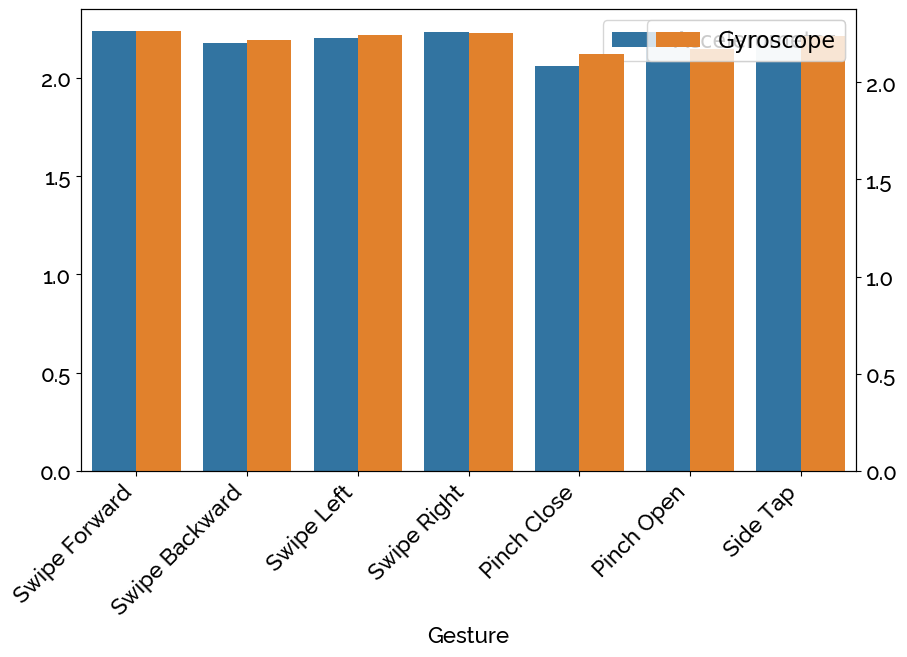

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

# Assign human-readable gesture labels
df["label_names"] = [LETTER_GESTURES[label] for label in df["label"]]

# Create primary bar plot for accelerometer
sns.barplot(
    x="label_names", y=f"acc_{metric}", 
    data=df[df["participant"].isin(updated_participants)], 
    ax=ax1, color="C0", width=0.4, label="Accelerometer", ci=None
)

# Create secondary axis for gyroscope
ax2 = ax1.twinx()

# Create secondary bar plot for gyroscope
sns.barplot(
    x="label_names", y=f"gyro_{metric}", 
    data=df[df["participant"].isin(updated_participants)], 
    ax=ax2, color="C1", width=0.4, label="Gyroscope", ci=None
)

# Align bars side by side
for bars1, bars2 in zip(ax1.containers, ax2.containers):
    for bar1, bar2 in zip(bars1, bars2):
        bar1.set_x(bar1.get_x() - 0.2)  # Shift left
        bar2.set_x(bar2.get_x() + 0.2)  # Shift right

# Rotate x labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', font=FONT, fontsize=16)

# Set axis labels
ax1.set_xlabel("Gesture", font=FONT, fontsize=16)
ax1.set_ylabel("", font=FONT, fontsize=16, color="C0")
ax2.set_ylabel("", font=FONT, fontsize=16, color="C1")

# Set font for y-axis ticks
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontproperties(FONT)
    label.set_fontsize(16)

# Add legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
# set legend font size
ax1.legend(fontsize=16)
ax2.legend(fontsize=16, loc = "upper right")

fig.savefig("energy_features.pdf", dpi=300, bbox_inches="tight")


C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_52556\3261203140.py:55: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=plot_df, x="Label", y="Value", hue="Sensor", palette=sns.color_palette("tab10"), ax=ax)
C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_52556\3261203140.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', font=FONT, fontsize=14)


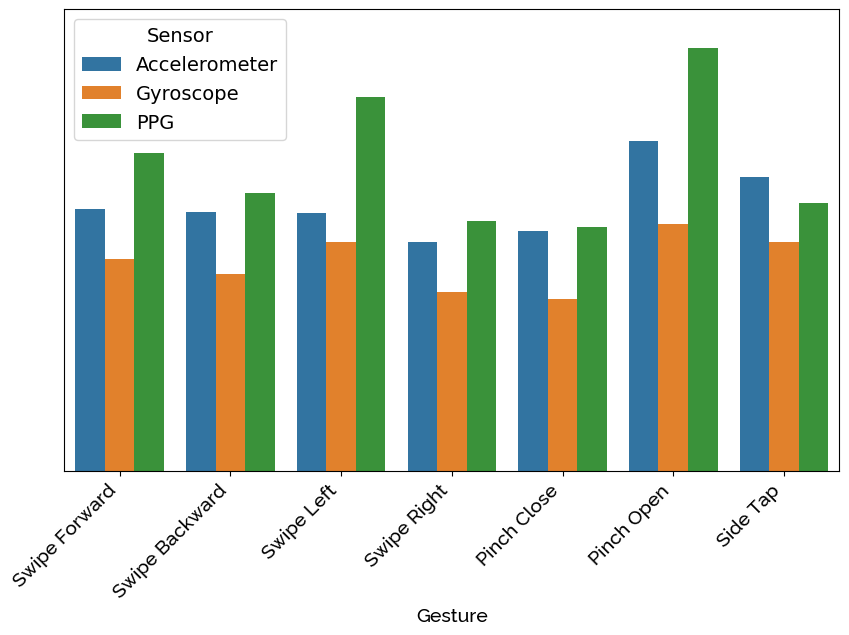

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define metrics to plot
metrics = ["Mean absolute deviation"]

# Compute normalized values for each metric
for metric in metrics:
    df[f"acc_{metric}"] = (
        df[f"acc_2_{metric}"]
        + df[f"acc_1_{metric}"]
        + df[f"acc_0_{metric}"]
    )
    df[f"gyro_{metric}"] = (
        df[f"gyro_2_{metric}"]
        + df[f"gyro_1_{metric}"]
        + df[f"gyro_0_{metric}"]
    )
    
    df[f"ppg_green_{metric}"] = np.sum(
        [df[f"ppg_green_{i}_{metric}"] for i in range(8)], axis=0
    )
    
    df[f"ppg_ir_{metric}"] = np.sum(
        [df[f"ppg_ir_{i}_{metric}"] for i in range(8)], axis=0
    )
    df[f"ppg_{metric}"] = df[f"ppg_green_{metric}"] + df[f"ppg_ir_{metric}"]

# Normalize each modality by its maximum value
sensors = {"Accelerometer": "acc",
           "Gyroscope": "gyro",
           "PPG" : "ppg"
           }
for sensor in sensors.values():
    for metric in metrics:
        max_value = df[f"{sensor}_{metric}"].max()
        df[f"{sensor}_{metric}"] /= max_value  # Normalize to max value

# Prepare data for plotting
plot_data = []
for label in df["label"].unique():
    df_label = df[df["label"] == label]  # Filter data for each label
    for sensor_name, sensor in sensors.items():
        for metric in metrics:
            plot_data.append({"Label": label, "Sensor": sensor_name, "Metric": metric, "Value": df_label[f"{sensor}_{metric}"].mean()})

plot_df = pd.DataFrame(plot_data)


plot_df["Label"] = plot_df["Label"].map(LETTER_GESTURES)
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the grouped bar chart with the 'tab10' colormap for hue
sns.barplot(data=plot_df, x="Label", y="Value", hue="Sensor", palette=sns.color_palette("tab10"), ax=ax)

ax.set_xlabel("Gesture", font=FONT, fontsize=14)
ax.set_ylabel("")
#plt.title("Comparison of Normalized RMS and MAD Across Sensors for Each Gesture")
plt.legend(title="Sensor", fontsize=14, title_fontsize=14, loc = "upper left")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', font=FONT, fontsize=14)
#plt.show()
# turn off y axis
ax.get_yaxis().set_visible(False)
ax.set_ylim(0, 0.07)

fig.savefig("features_per_gesture.pdf", dpi=300, bbox_inches="tight")



In [160]:
df = pd.read_csv(data_path)
#df = df[df["participant"].isin(updated_participants)]
df = df[df["label"].isin(["a", "b", "c", "d", "sp", "po", "pc", "o"])]

split_file = r"C:\Users\lhauptmann\Code\WristPPG2\data\splits\split_participants.csv"
split_df = pd.read_csv(split_file)
split_df

,file,participant,session_number,file_name,split,split_test
0,/local/home/lhauptmann/data/ppg_gestures_2_upd...,alex,1,participant_alex_1.hdf5,6,7
1,/local/home/lhauptmann/data/ppg_gestures_2_upd...,alex,2,participant_alex_2.hdf5,6,7
2,/local/home/lhauptmann/data/ppg_gestures_2_upd...,alex,3,participant_alex_3.hdf5,6,7
3,/local/home/lhauptmann/data/ppg_gestures_2_upd...,alex,4,participant_alex_4.hdf5,6,7
4,/local/home/lhauptmann/data/ppg_gestures_2_upd...,amran,1,participant_amran_1.hdf5,3,4
...,...,...,...,...,...,...
245,/local/home/lhauptmann/data/ppg_gestures_2_upd...,ying,4,participant_ying_4.hdf5,1,2
246,/local/home/lhauptmann/data/ppg_gestures_2_upd...,zhipeng,1,participant_zhipeng_1.hdf5,7,0
247,/local/home/lhauptmann/data/ppg_gestures_2_upd...,zhipeng,2,participant_zhipeng_2.hdf5,7,0
248,/local/home/lhauptmann/data/ppg_gestures_2_upd...,zhipeng,3,participant_zhipeng_3.hdf5,7,0



Running Random Forest...

Processing split 0

Number of NaN values in each column:
ppg_ir_4_Kurtosis    1
ppg_ir_4_Skewness    1
dtype: int64


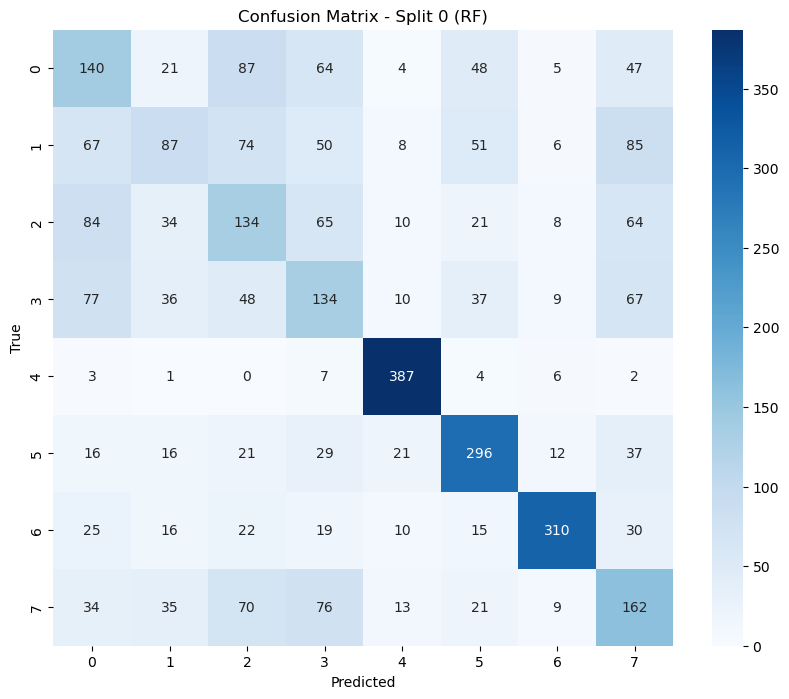


Classification Report - Split 0:
              precision    recall  f1-score   support

           a       0.31      0.34      0.32       416
           b       0.35      0.20      0.26       428
           c       0.29      0.32      0.31       420
           d       0.30      0.32      0.31       418
           o       0.84      0.94      0.89       410
          pc       0.60      0.66      0.63       448
          po       0.85      0.69      0.76       447
          sp       0.33      0.39      0.35       420

    accuracy                           0.48      3407
   macro avg       0.48      0.48      0.48      3407
weighted avg       0.49      0.48      0.48      3407


Processing split 1

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

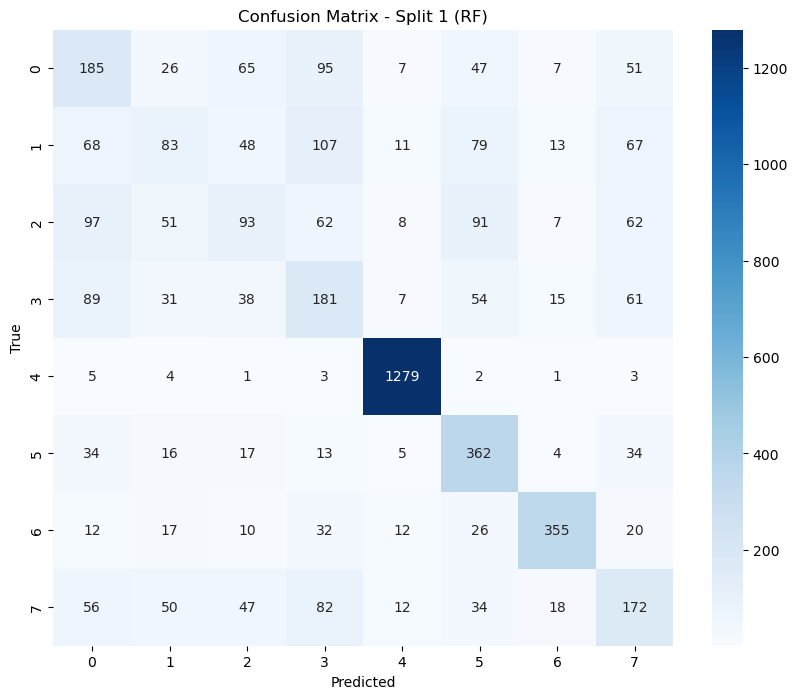


Classification Report - Split 1:
              precision    recall  f1-score   support

           a       0.34      0.38      0.36       483
           b       0.30      0.17      0.22       476
           c       0.29      0.20      0.24       471
           d       0.31      0.38      0.34       476
           o       0.95      0.99      0.97      1298
          pc       0.52      0.75      0.61       485
          po       0.85      0.73      0.79       484
          sp       0.37      0.37      0.37       471

    accuracy                           0.58      4644
   macro avg       0.49      0.50      0.49      4644
weighted avg       0.57      0.58      0.57      4644


Processing split 2

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

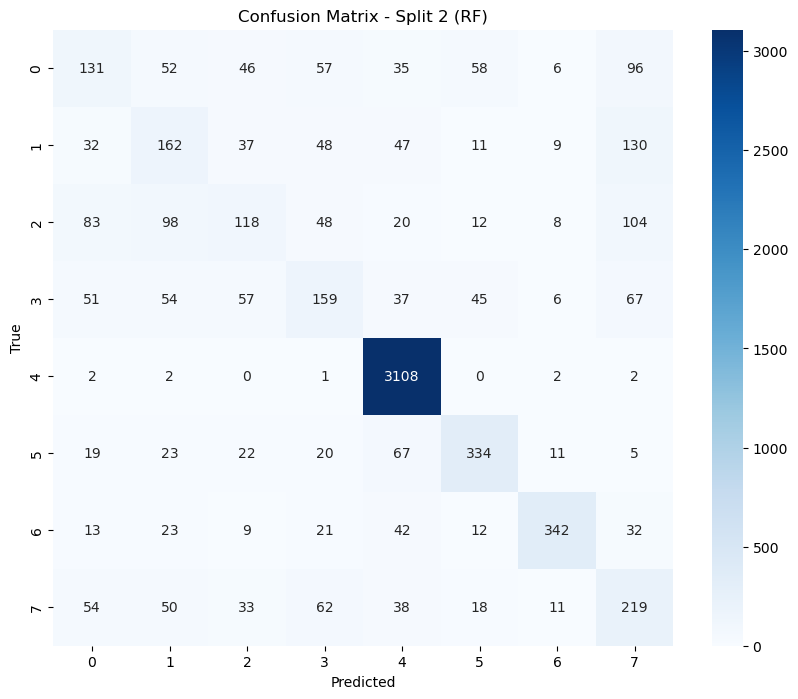


Classification Report - Split 2:
              precision    recall  f1-score   support

           a       0.34      0.27      0.30       481
           b       0.35      0.34      0.34       476
           c       0.37      0.24      0.29       491
           d       0.38      0.33      0.36       476
           o       0.92      1.00      0.95      3117
          pc       0.68      0.67      0.67       501
          po       0.87      0.69      0.77       494
          sp       0.33      0.45      0.38       485

    accuracy                           0.70      6521
   macro avg       0.53      0.50      0.51      6521
weighted avg       0.69      0.70      0.69      6521


Processing split 3

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_5_Kurtosis       1
ppg_ir_5_Skewness      

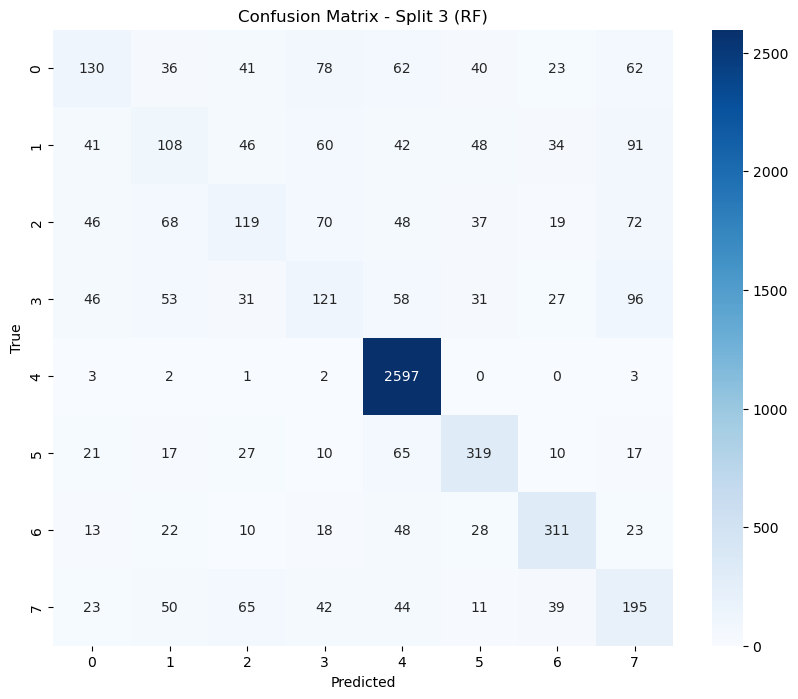


Classification Report - Split 3:
              precision    recall  f1-score   support

           a       0.40      0.28      0.33       472
           b       0.30      0.23      0.26       470
           c       0.35      0.25      0.29       479
           d       0.30      0.26      0.28       463
           o       0.88      1.00      0.93      2608
          pc       0.62      0.66      0.64       486
          po       0.67      0.66      0.66       473
          sp       0.35      0.42      0.38       469

    accuracy                           0.66      5920
   macro avg       0.48      0.47      0.47      5920
weighted avg       0.63      0.66      0.64      5920


Processing split 4

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

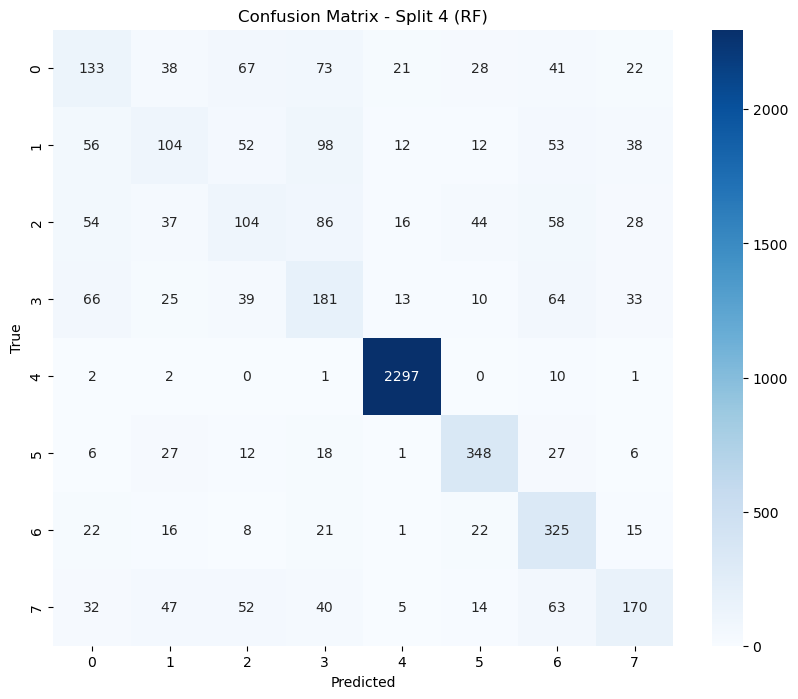


Classification Report - Split 4:
              precision    recall  f1-score   support

           a       0.36      0.31      0.34       423
           b       0.35      0.24      0.29       425
           c       0.31      0.24      0.27       427
           d       0.35      0.42      0.38       431
           o       0.97      0.99      0.98      2313
          pc       0.73      0.78      0.75       445
          po       0.51      0.76      0.61       430
          sp       0.54      0.40      0.46       423

    accuracy                           0.69      5317
   macro avg       0.51      0.52      0.51      5317
weighted avg       0.68      0.69      0.68      5317


Processing split 5

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

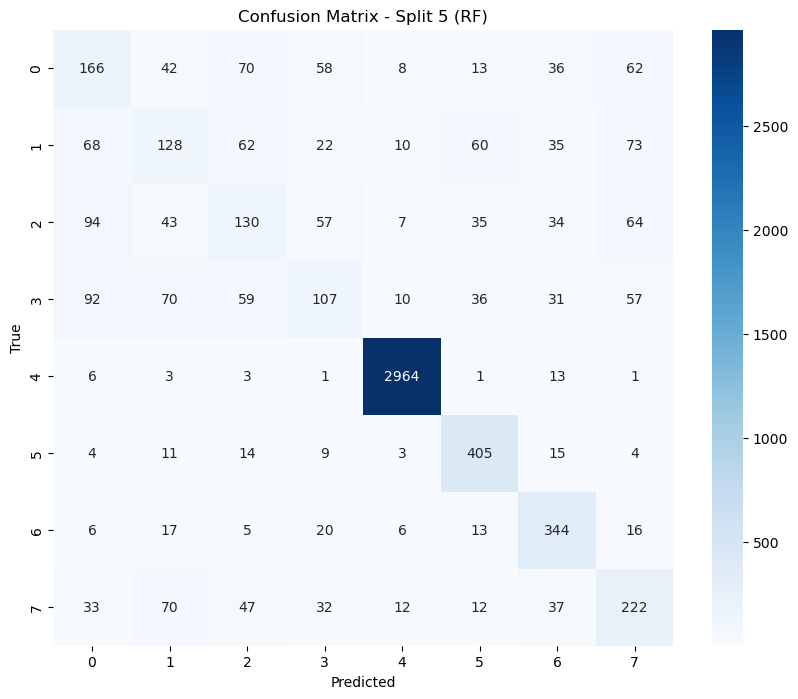


Classification Report - Split 5:
              precision    recall  f1-score   support

           a       0.35      0.36      0.36       455
           b       0.33      0.28      0.30       458
           c       0.33      0.28      0.30       464
           d       0.35      0.23      0.28       462
           o       0.98      0.99      0.99      2992
          pc       0.70      0.87      0.78       465
          po       0.63      0.81      0.71       427
          sp       0.44      0.48      0.46       465

    accuracy                           0.72      6188
   macro avg       0.52      0.54      0.52      6188
weighted avg       0.71      0.72      0.71      6188


Processing split 6

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

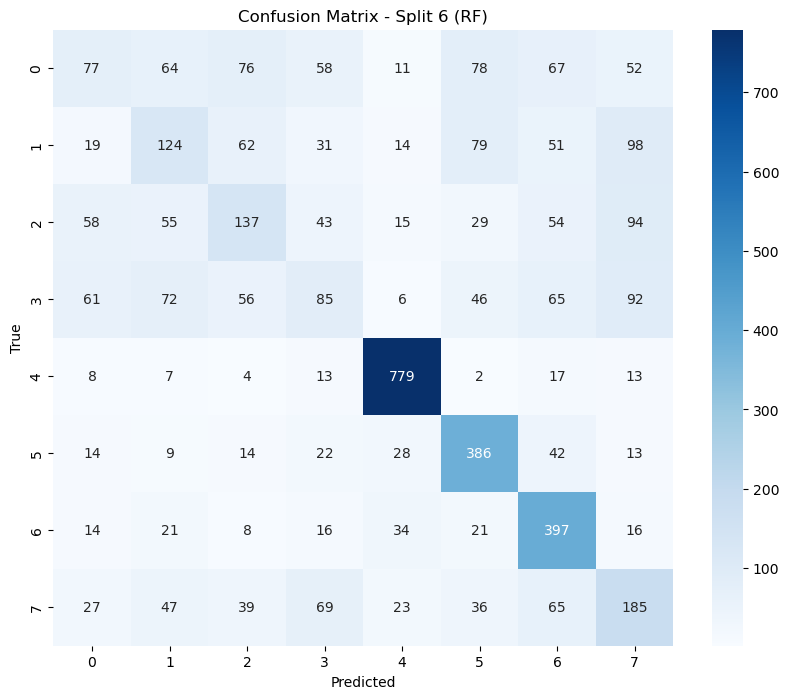


Classification Report - Split 6:
              precision    recall  f1-score   support

           a       0.28      0.16      0.20       483
           b       0.31      0.26      0.28       478
           c       0.35      0.28      0.31       485
           d       0.25      0.18      0.21       483
           o       0.86      0.92      0.89       843
          pc       0.57      0.73      0.64       528
          po       0.52      0.75      0.62       527
          sp       0.33      0.38      0.35       491

    accuracy                           0.50      4318
   macro avg       0.43      0.46      0.44      4318
weighted avg       0.47      0.50      0.48      4318


Processing split 7

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

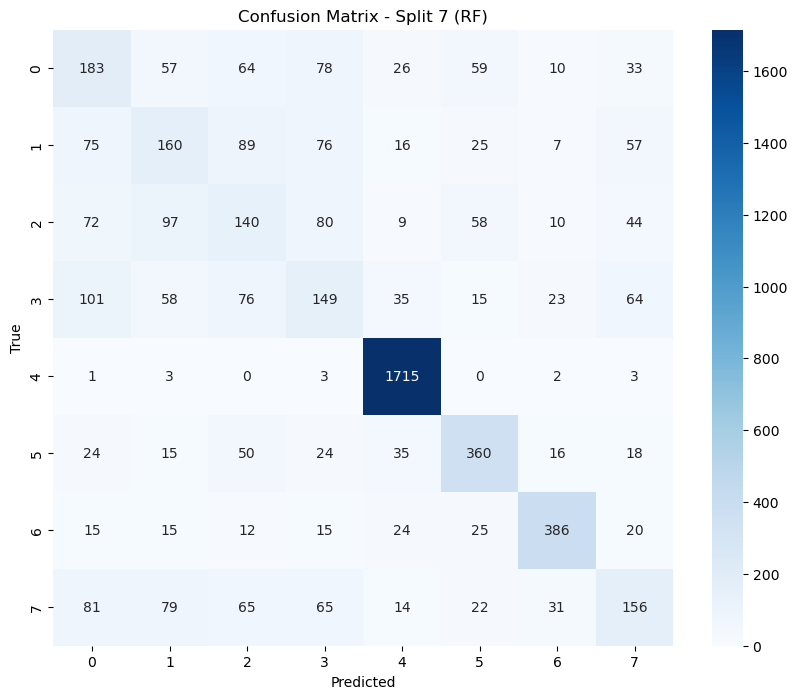


Classification Report - Split 7:
              precision    recall  f1-score   support

           a       0.33      0.36      0.34       510
           b       0.33      0.32      0.32       505
           c       0.28      0.27      0.28       510
           d       0.30      0.29      0.29       521
           o       0.92      0.99      0.95      1727
          pc       0.64      0.66      0.65       542
          po       0.80      0.75      0.77       512
          sp       0.39      0.30      0.34       513

    accuracy                           0.61      5340
   macro avg       0.50      0.49      0.50      5340
weighted avg       0.59      0.61      0.60      5340


Running SVM...

Processing split 0

Number of NaN values in each column:
ppg_ir_4_Kurtosis    1
ppg_ir_4_Skewness    1
dtype: int64


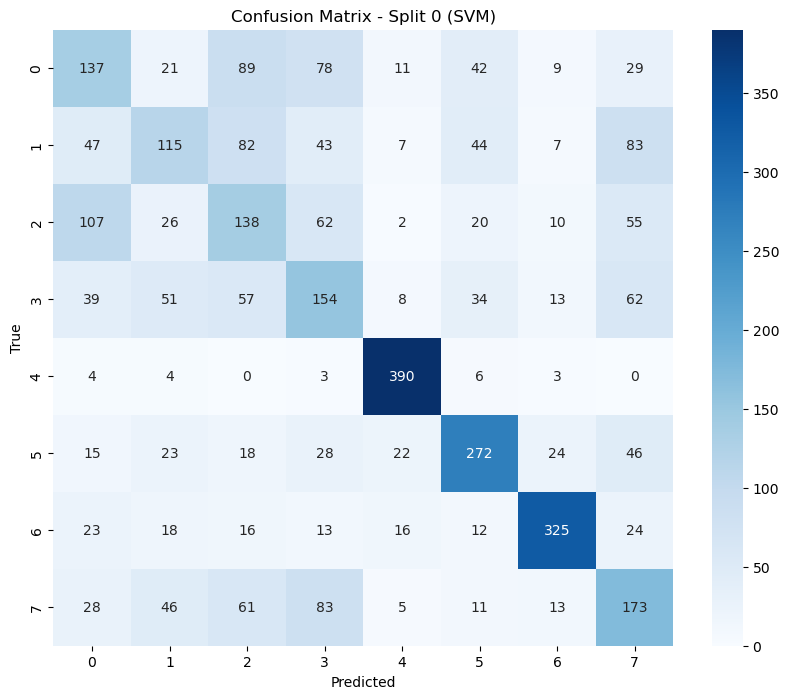


Classification Report - Split 0:
              precision    recall  f1-score   support

           a       0.34      0.33      0.34       416
           b       0.38      0.27      0.31       428
           c       0.30      0.33      0.31       420
           d       0.33      0.37      0.35       418
           o       0.85      0.95      0.90       410
          pc       0.62      0.61      0.61       448
          po       0.80      0.73      0.76       447
          sp       0.37      0.41      0.39       420

    accuracy                           0.50      3407
   macro avg       0.50      0.50      0.50      3407
weighted avg       0.50      0.50      0.50      3407


Processing split 1

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

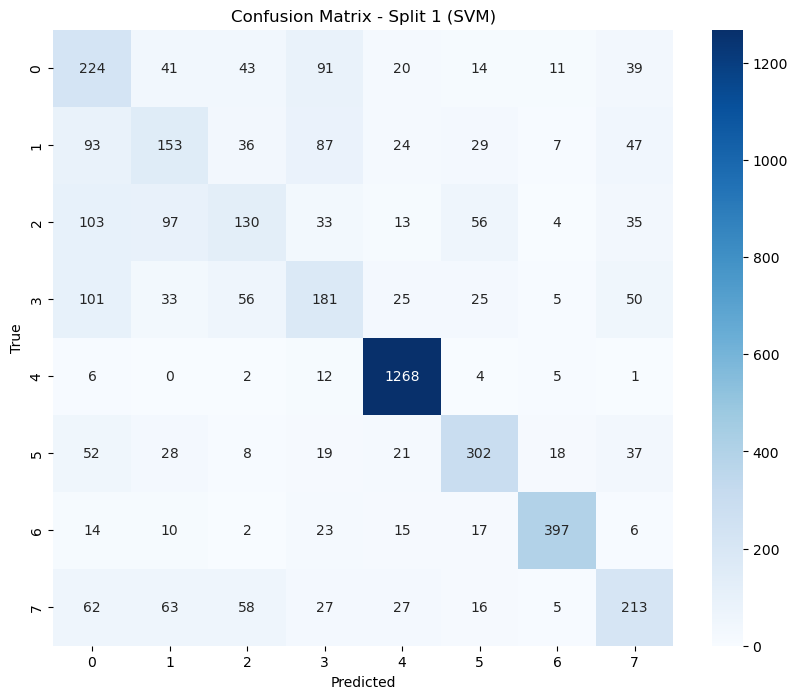


Classification Report - Split 1:
              precision    recall  f1-score   support

           a       0.34      0.46      0.39       483
           b       0.36      0.32      0.34       476
           c       0.39      0.28      0.32       471
           d       0.38      0.38      0.38       476
           o       0.90      0.98      0.94      1298
          pc       0.65      0.62      0.64       485
          po       0.88      0.82      0.85       484
          sp       0.50      0.45      0.47       471

    accuracy                           0.62      4644
   macro avg       0.55      0.54      0.54      4644
weighted avg       0.61      0.62      0.61      4644


Processing split 2

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

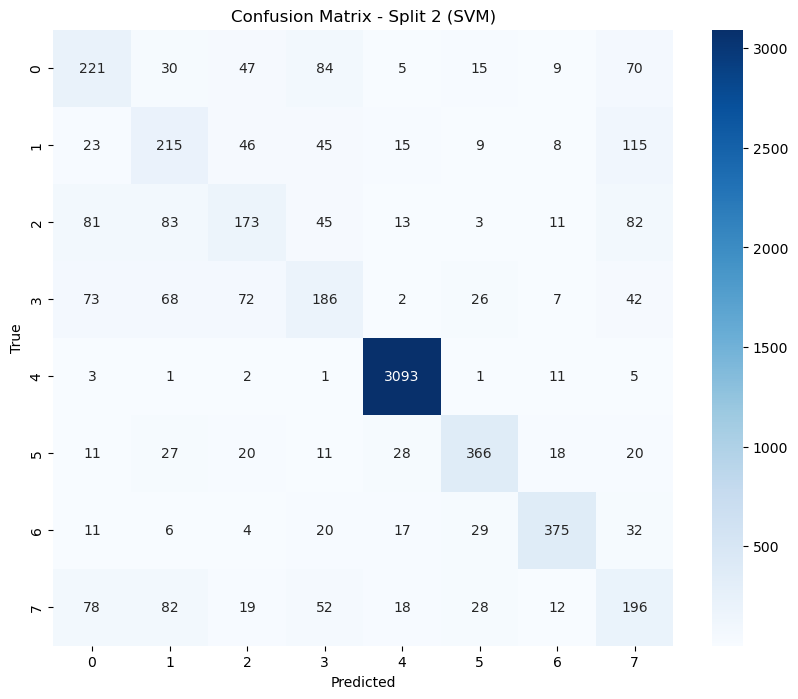


Classification Report - Split 2:
              precision    recall  f1-score   support

           a       0.44      0.46      0.45       481
           b       0.42      0.45      0.44       476
           c       0.45      0.35      0.40       491
           d       0.42      0.39      0.40       476
           o       0.97      0.99      0.98      3117
          pc       0.77      0.73      0.75       501
          po       0.83      0.76      0.79       494
          sp       0.35      0.40      0.37       485

    accuracy                           0.74      6521
   macro avg       0.58      0.57      0.57      6521
weighted avg       0.74      0.74      0.74      6521


Processing split 3

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_5_Kurtosis       1
ppg_ir_5_Skewness      

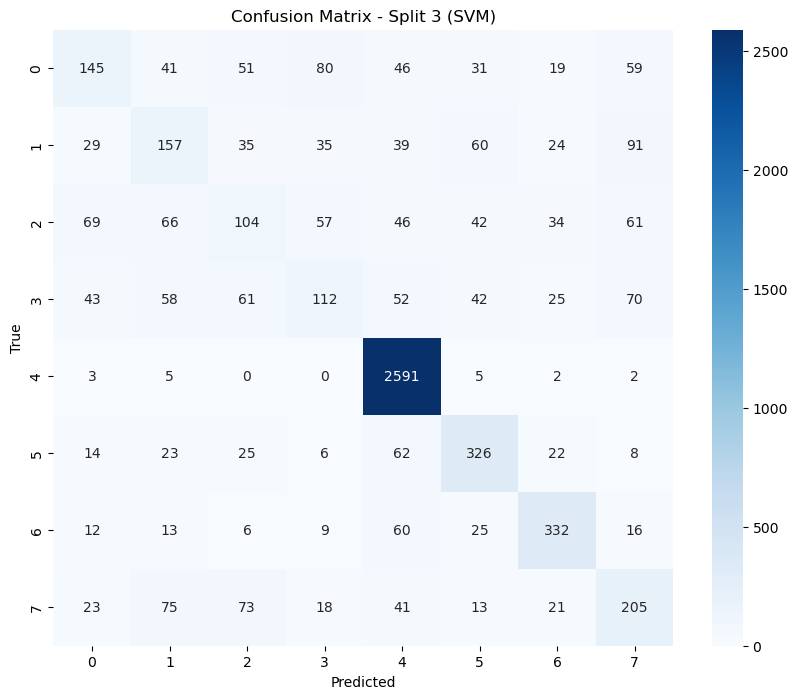


Classification Report - Split 3:
              precision    recall  f1-score   support

           a       0.43      0.31      0.36       472
           b       0.36      0.33      0.35       470
           c       0.29      0.22      0.25       479
           d       0.35      0.24      0.29       463
           o       0.88      0.99      0.93      2608
          pc       0.60      0.67      0.63       486
          po       0.69      0.70      0.70       473
          sp       0.40      0.44      0.42       469

    accuracy                           0.67      5920
   macro avg       0.50      0.49      0.49      5920
weighted avg       0.64      0.67      0.65      5920


Processing split 4

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

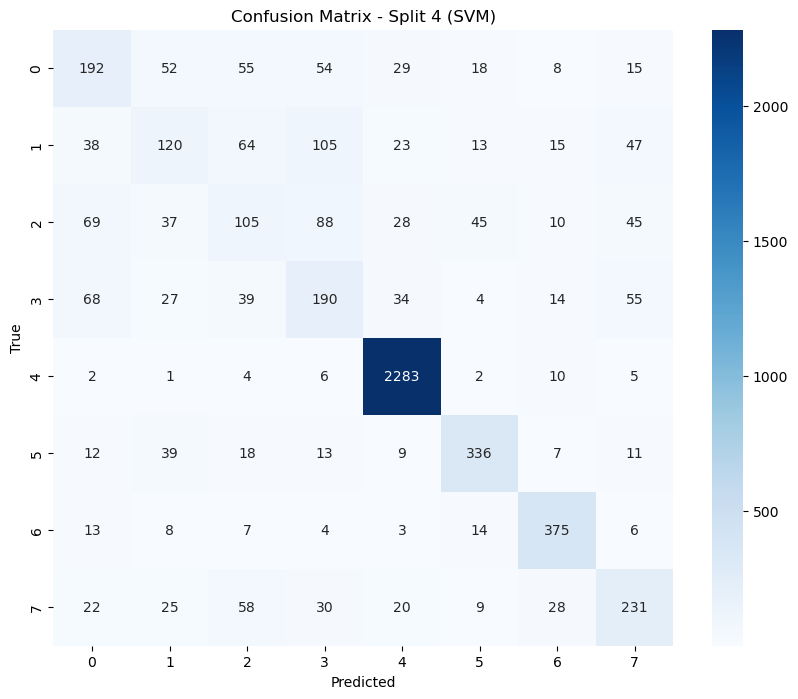


Classification Report - Split 4:
              precision    recall  f1-score   support

           a       0.46      0.45      0.46       423
           b       0.39      0.28      0.33       425
           c       0.30      0.25      0.27       427
           d       0.39      0.44      0.41       431
           o       0.94      0.99      0.96      2313
          pc       0.76      0.76      0.76       445
          po       0.80      0.87      0.84       430
          sp       0.56      0.55      0.55       423

    accuracy                           0.72      5317
   macro avg       0.57      0.57      0.57      5317
weighted avg       0.71      0.72      0.71      5317


Processing split 5

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

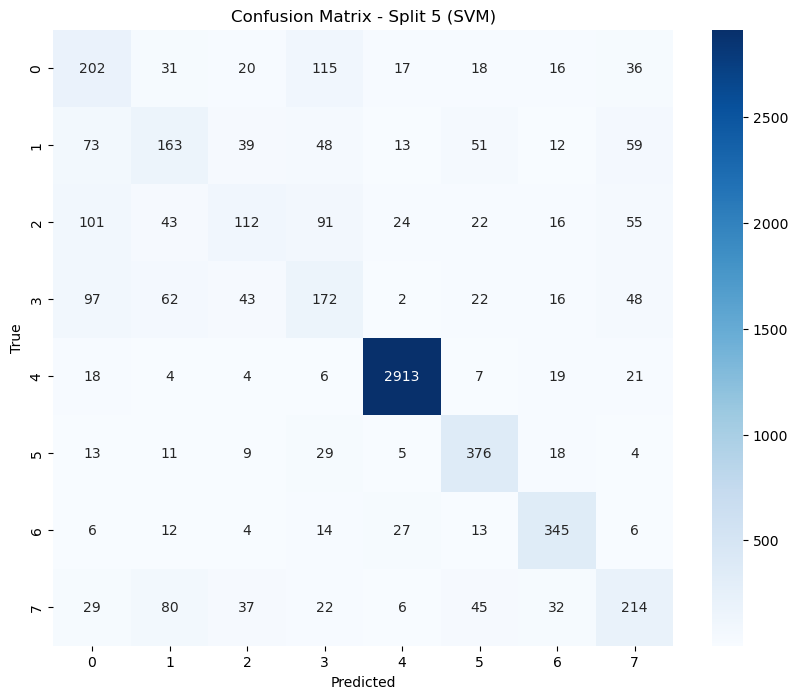


Classification Report - Split 5:
              precision    recall  f1-score   support

           a       0.37      0.44      0.41       455
           b       0.40      0.36      0.38       458
           c       0.42      0.24      0.31       464
           d       0.35      0.37      0.36       462
           o       0.97      0.97      0.97      2992
          pc       0.68      0.81      0.74       465
          po       0.73      0.81      0.77       427
          sp       0.48      0.46      0.47       465

    accuracy                           0.73      6188
   macro avg       0.55      0.56      0.55      6188
weighted avg       0.72      0.73      0.72      6188


Processing split 6

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

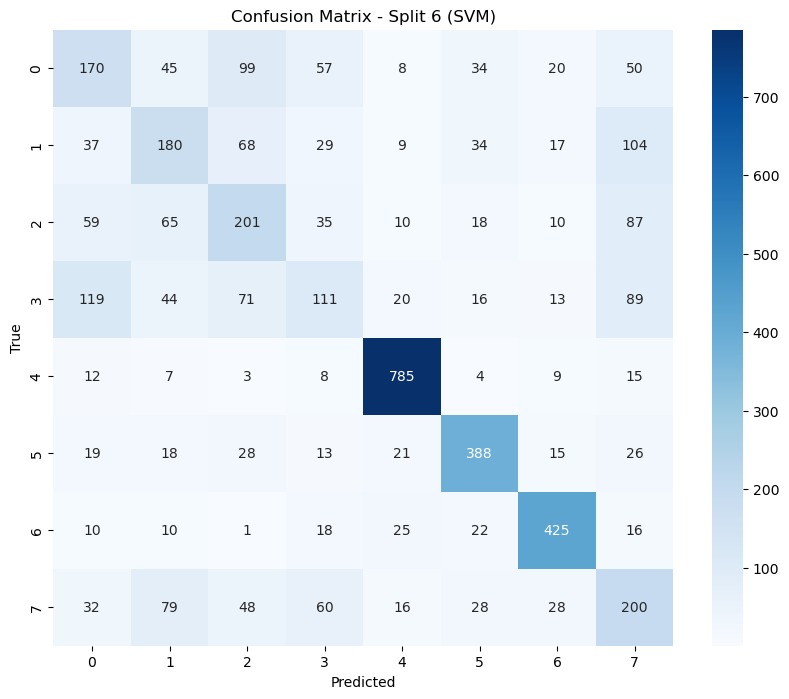


Classification Report - Split 6:
              precision    recall  f1-score   support

           a       0.37      0.35      0.36       483
           b       0.40      0.38      0.39       478
           c       0.39      0.41      0.40       485
           d       0.34      0.23      0.27       483
           o       0.88      0.93      0.90       843
          pc       0.71      0.73      0.72       528
          po       0.79      0.81      0.80       527
          sp       0.34      0.41      0.37       491

    accuracy                           0.57      4318
   macro avg       0.53      0.53      0.53      4318
weighted avg       0.56      0.57      0.56      4318


Processing split 7

Number of NaN values in each column:
ppg_green_0_Kurtosis    1
ppg_green_0_Skewness    1
ppg_green_1_Kurtosis    1
ppg_green_1_Skewness    1
ppg_green_7_Kurtosis    1
ppg_green_7_Skewness    1
ppg_ir_3_Kurtosis       1
ppg_ir_3_Skewness       1
ppg_ir_4_Kurtosis       1
ppg_ir_4_Skewness      

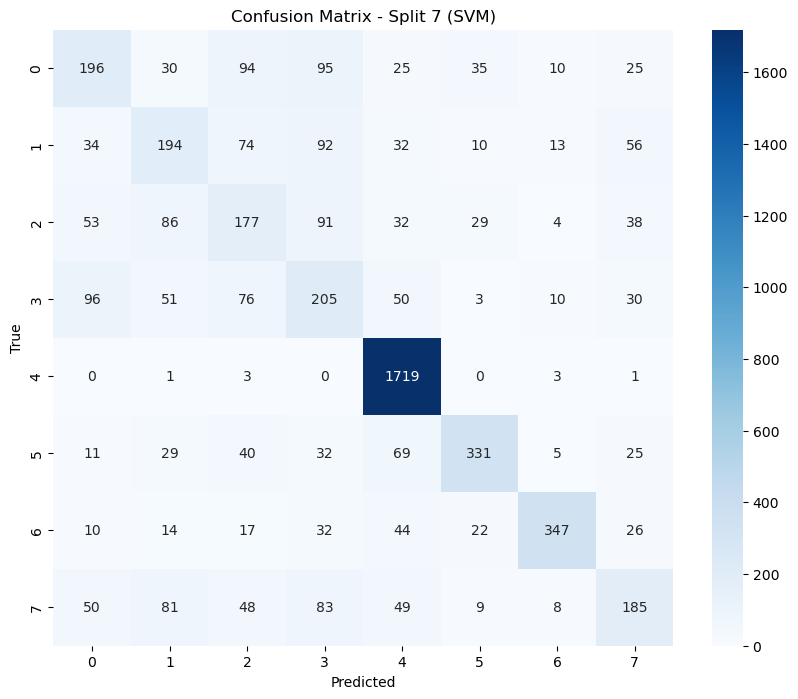


Classification Report - Split 7:
              precision    recall  f1-score   support

           a       0.44      0.38      0.41       510
           b       0.40      0.38      0.39       505
           c       0.33      0.35      0.34       510
           d       0.33      0.39      0.36       521
           o       0.85      1.00      0.92      1727
          pc       0.75      0.61      0.67       542
          po       0.87      0.68      0.76       512
          sp       0.48      0.36      0.41       513

    accuracy                           0.63      5340
   macro avg       0.56      0.52      0.53      5340
weighted avg       0.62      0.63      0.62      5340


Top 10 Most Important Features (Random Forest, averaged across splits):
                                        feature  mean_importance  \
22                     acc_0_Human range energy         0.004814   
780                      gyro_2_Absolute energy         0.004643   
66                        acc_0_Power 

In [162]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, Dict, Any
import pandas as pd

def prepare_split_data(df: pd.DataFrame, 
                      split_df: pd.DataFrame, 
                      split: int) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Prepare train and test data for a given split
    """
    train_participants = split_df[split_df["split_test"] != split]["participant"].unique()
    test_participants = split_df[split_df["split_test"] == split]["participant"].unique()
    
    X_test = df[df["participant"].isin(test_participants)]
    X_train = df[df["participant"].isin(train_participants)]
    
    y_test = X_test["label"]
    y_train = X_train["label"]
    
    # drop columns that are not features
    drops = ["participant", "session", "label", "label_names"]
    X_train = X_train.drop(columns=drops, errors="ignore")
    X_test = X_test.drop(columns=drops, errors="ignore")
    
    # Handle missing values
    # First, check how many NaN values we have
    nan_counts = X_train.isna().sum()
    print(f"\nNumber of NaN values in each column:")
    print(nan_counts[nan_counts > 0])
    
    # Fill NaN values with median for each column
    for column in X_train.columns:
        median_value = X_train[column].median()
        X_train[column] = X_train[column].fillna(median_value)
        X_test[column] = X_test[column].fillna(median_value)
    
    # Scale the features (important for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrame to keep column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    # Verify no NaN values remain
    if X_train_scaled.isna().any().any() or X_test_scaled.isna().any().any():
        raise ValueError("NaN values still present after preprocessing")
    
    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate_split(X_train: pd.DataFrame,
                           X_test: pd.DataFrame,
                           y_train: pd.Series,
                           y_test: pd.Series,
                           model_type: str = 'rf',
                           model_params: Dict[str, Any] = None) -> Dict:
    """
    Train and evaluate model for a single split
    """
    if model_params is None:
        model_params = {}
    
    # Initialize model based on type
    if model_type == 'rf':
        default_params = {'n_estimators': 100, 'random_state': 42}
        model = RandomForestClassifier(**{**default_params, **model_params})
    elif model_type == 'svm':
        default_params = {'kernel': 'rbf', 'random_state': 42}
        model = SVC(**{**default_params, **model_params})
    else:
        raise ValueError(f"Unknown model type: {model_type}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get feature importance (only for Random Forest)
    feature_importance = None
    if model_type == 'rf':
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
    
    # Return results
    return {
        'model': model,
        'predictions': y_pred,
        'true_labels': y_test,
        'feature_importance': feature_importance,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

def evaluate_all_splits(df: pd.DataFrame, 
                       split_df: pd.DataFrame,
                       model_type: str = 'rf',
                       model_params: Dict[str, Any] = None,
                       n_splits: int = 8,
                       plot_results: bool = True) -> Dict:
    """
    Evaluate model on all splits
    """
    all_results = {}
    overall_importance = pd.DataFrame()
    
    for split in range(n_splits):
        print(f"\nProcessing split {split}")
        
        # Prepare data for this split
        X_train, X_test, y_train, y_test = prepare_split_data(df, split_df, split)
        
        # Train and evaluate
        results = train_and_evaluate_split(X_train, X_test, y_train, y_test, 
                                         model_type, model_params)
        all_results[split] = results
        
        # Aggregate feature importance (only for Random Forest)
        if results['feature_importance'] is not None:
            split_importance = results['feature_importance'].copy()
            split_importance.columns = ['feature', f'importance_split_{split}']
            if overall_importance.empty:
                overall_importance = split_importance
            else:
                overall_importance = overall_importance.merge(
                    split_importance, on='feature', how='outer'
                )
        
        # Plot confusion matrix if requested
        if plot_results:
            plt.figure(figsize=(10,8))
            sns.heatmap(results['confusion_matrix'], 
                       annot=True, 
                       fmt='d', 
                       cmap='Blues')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.title(f'Confusion Matrix - Split {split} ({model_type.upper()})')
            plt.show()
            
            # Print classification report
            print(f"\nClassification Report - Split {split}:")
            print(classification_report(results['true_labels'], 
                                     results['predictions']))
    
    # Calculate average feature importance across splits (only for Random Forest)
    if not overall_importance.empty:
        importance_cols = [col for col in overall_importance.columns 
                         if 'importance_split_' in col]
        overall_importance['mean_importance'] = overall_importance[importance_cols].mean(axis=1)
        overall_importance['std_importance'] = overall_importance[importance_cols].std(axis=1)
        overall_importance = overall_importance.sort_values('mean_importance', ascending=False)
    
    return {
        'split_results': all_results,
        'feature_importance': overall_importance if not overall_importance.empty else None
    }

# Example usage for both models
# Random Forest
print("\nRunning Random Forest...")
rf_results = evaluate_all_splits(df, split_df, model_type='rf')

# SVM
print("\nRunning SVM...")
svm_results = evaluate_all_splits(df, split_df, model_type='svm')

# Print overall feature importance for Random Forest
if rf_results['feature_importance'] is not None:
    print("\nTop 10 Most Important Features (Random Forest, averaged across splits):")
    print(rf_results['feature_importance'][['feature', 'mean_importance', 'std_importance']].head(10))

# Function to calculate and print average metrics
def print_average_metrics(results: Dict, model_name: str):
    avg_metrics = {}
    for split, split_results in results['split_results'].items():
        for metric, value in split_results['classification_report'].items():
            if isinstance(value, dict):
                if metric not in avg_metrics:
                    avg_metrics[metric] = {'precision': [], 'recall': [], 'f1-score': [], 'support': []}
                avg_metrics[metric]['precision'].append(value['precision'])
                avg_metrics[metric]['recall'].append(value['recall'])
                avg_metrics[metric]['f1-score'].append(value['f1-score'])
                avg_metrics[metric]['support'].append(value['support'])

    print(f"\nAverage Performance Metrics Across Splits ({model_name}):")
    for class_label, metrics in avg_metrics.items():
        print(f"\nClass: {class_label}")
        for metric, values in metrics.items():
            mean_value = np.mean(values)
            std_value = np.std(values)
            print(f"{metric}: {mean_value:.3f} (±{std_value:.3f})")

# Print average metrics for both models
print_average_metrics(rf_results, "Random Forest")
print_average_metrics(svm_results, "SVM")

# Save results to pickle file
from datetime import datetime
import pickle

results_dict = {
    'random_forest': rf_results,
    'svm': svm_results,
    'timestamp': datetime.now(),
    'model_info': {
        'random_forest': {
            'type': 'RandomForestClassifier',
            'params': rf_results['split_results'][0]['model'].get_params()
        },
        'svm': {
            'type': 'SVC',
            'params': svm_results['split_results'][0]['model'].get_params()
        }
    }
}

# Create filename with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f'classification_results_{timestamp}.pkl'

# Save to pickle file
with open(filename, 'wb') as f:
    pickle.dump(results_dict, f)

print(f"\nResults saved to: {filename}")

# Function to load results (for future reference)
def load_results(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
# Example of loading results:
# loaded_results = load_results(filename)

In [163]:
results_dict

{'random_forest': {'split_results': {0: {'model': RandomForestClassifier(random_state=42),
    'predictions': array(['c', 'c', 'c', ..., 'd', 'pc', 'o'], dtype=object),
    'true_labels': 5460      a
    5461      a
    5462      a
    5463      a
    5464      a
             ..
    51779    sp
    51780    sp
    51781    sp
    51782    sp
    51783    sp
    Name: label, Length: 3407, dtype: object,
    'feature_importance':                              feature  importance
    22          acc_0_Human range energy    0.006524
    780           gyro_2_Absolute energy    0.005032
    853         gyro_2_Spectral distance    0.003737
    329                     acc_2_ECDF_8    0.003720
    58        acc_0_Median absolute diff    0.003392
    ...                              ...         ...
    1776    ppg_green_5_Median frequency    0.000000
    3336       ppg_ir_7_Median frequency    0.000000
    1715  ppg_green_4_Zero crossing rate    0.000000
    2963     ppg_ir_4_Zero crossing rate  

In [164]:
def calculate_aggregate_metrics(results):
    """Calculate mean and std of metrics across all folds"""
    metrics = {
        'accuracy': [],
        'macro_precision': [],
        'macro_recall': [],
        'macro_f1': [],
        'weighted_precision': [],
        'weighted_recall': [],
        'weighted_f1': []
    }
    
    # Collect metrics from each fold
    for split_result in results['split_results'].values():
        report = split_result['classification_report']
        
        # Get accuracy
        metrics['accuracy'].append(report['accuracy'])
        
        # Get macro and weighted averages
        for avg in ['macro avg', 'weighted avg']:
            prefix = avg.split()[0] + '_'
            metrics[prefix + 'precision'].append(report[avg]['precision'])
            metrics[prefix + 'recall'].append(report[avg]['recall'])
            metrics[prefix + 'f1'].append(report[avg]['f1-score'])
    
    # Calculate mean and std for each metric
    summary = {}
    for metric, values in metrics.items():
        mean_val = np.mean(values)
        std_val = np.std(values)
        summary[metric] = {
            'mean': mean_val,
            'std': std_val
        }
    
    return summary

# Calculate metrics for both models
rf_metrics = calculate_aggregate_metrics(rf_results)
svm_metrics = calculate_aggregate_metrics(svm_results)

# Print results in a formatted way
print("\n=== Random Forest 8-Fold Results ===")
print(f"Accuracy:     {rf_metrics['accuracy']['mean']:.3f} ± {rf_metrics['accuracy']['std']:.3f}")
print("\nMacro Averages:")
print(f"Precision:    {rf_metrics['macro_precision']['mean']:.3f} ± {rf_metrics['macro_precision']['std']:.3f}")
print(f"Recall:       {rf_metrics['macro_recall']['mean']:.3f} ± {rf_metrics['macro_recall']['std']:.3f}")
print(f"F1-Score:     {rf_metrics['macro_f1']['mean']:.3f} ± {rf_metrics['macro_f1']['std']:.3f}")
print("\nWeighted Averages:")
print(f"Precision:    {rf_metrics['weighted_precision']['mean']:.3f} ± {rf_metrics['weighted_precision']['std']:.3f}")
print(f"Recall:       {rf_metrics['weighted_recall']['mean']:.3f} ± {rf_metrics['weighted_recall']['std']:.3f}")
print(f"F1-Score:     {rf_metrics['weighted_f1']['mean']:.3f} ± {rf_metrics['weighted_f1']['std']:.3f}")

print("\n=== SVM 8-Fold Results ===")
print(f"Accuracy:     {svm_metrics['accuracy']['mean']:.3f} ± {svm_metrics['accuracy']['std']:.3f}")
print("\nMacro Averages:")
print(f"Precision:    {svm_metrics['macro_precision']['mean']:.3f} ± {svm_metrics['macro_precision']['std']:.3f}")
print(f"Recall:       {svm_metrics['macro_recall']['mean']:.3f} ± {svm_metrics['macro_recall']['std']:.3f}")
print(f"F1-Score:     {svm_metrics['macro_f1']['mean']:.3f} ± {svm_metrics['macro_f1']['std']:.3f}")
print("\nWeighted Averages:")
print(f"Precision:    {svm_metrics['weighted_precision']['mean']:.3f} ± {svm_metrics['weighted_precision']['std']:.3f}")
print(f"Recall:       {svm_metrics['weighted_recall']['mean']:.3f} ± {svm_metrics['weighted_recall']['std']:.3f}")
print(f"F1-Score:     {svm_metrics['weighted_f1']['mean']:.3f} ± {svm_metrics['weighted_f1']['std']:.3f}")


=== Random Forest 8-Fold Results ===
Accuracy:     0.619 ± 0.084

Macro Averages:
Precision:    0.494 ± 0.028
Recall:       0.494 ± 0.024
F1-Score:     0.489 ± 0.025

Weighted Averages:
Precision:    0.603 ± 0.083
Recall:       0.619 ± 0.084
F1-Score:     0.607 ± 0.085

=== SVM 8-Fold Results ===
Accuracy:     0.647 ± 0.079

Macro Averages:
Precision:    0.542 ± 0.029
Recall:       0.534 ± 0.029
F1-Score:     0.535 ± 0.029

Weighted Averages:
Precision:    0.638 ± 0.077
Recall:       0.647 ± 0.079
F1-Score:     0.640 ± 0.078
